# NUMBER OF INCIDENTS PER STATES PER YEAR?

In [5]:
incidents_per_state=crime.groupby(['State','Year'])['Record ID'].count().nlargest(2).reset_index()
incidents_per_state=incidents_per_state.rename(columns={'Record ID':'Total Incident'})
incidents_per_state.sort_values(by='Total Incident',ascending=False)
incidents_per_state

,State,Year,Total Incident
0,California,1993,4369
1,California,1992,4195


# WHICH MONTH WIFE"S HAVE MORE TENDENCY TO HURT HUSBAND?

In [6]:
q=crime[(crime['Victim Sex']=='Male') & (crime['Perpetrator Sex']=='Female') & (crime['Relationship']=='Husband')]
q1=q.groupby('Month')['Record ID'].count().reset_index()
q1=q1.rename(columns = {'Record ID': 'Total Incident'})
q1.sort_values(by='Total Incident',ascending=False)

,Month,Total Incident
5,July,827
2,December,765
6,June,758
1,August,755
8,May,740
7,March,724
11,September,718
4,January,707
0,April,656
9,November,650


# Number of incident involving Ex-husband vs Ex wife (olderor yonger)

In [7]:
H=crime[(crime['Victim Sex']=='Male') & (crime['Perpetrator Sex']=='Female') & (crime['Relationship']=='Ex-Husband')]
H1=crime[(crime['Victim Sex']=='Female') & (crime['Perpetrator Sex']=='Male') & (crime['Relationship']=='Ex-Wife')]
total=len(H1)+len(H)
print('Total incident between ex husband vs ex wife is',total)

Total incident between ex husband vs ex wife is 2428


# Number of incident between Employee and employer?

In [8]:
E=crime[crime['Relationship']=='Employee']   |   crime[crime['Relationship']=='Employer']
len(E)

893

# Gender wise weapon used in Incident

In [9]:
Gender_wise_weapon=crime[(crime['Perpetrator Sex']=='Male') | (crime['Perpetrator Sex']=='Female') | (crime['Perpetrator Sex']=='Unknown')]
GG=Gender_wise_weapon[['Perpetrator Sex','Weapon']]
GG1=GG.groupby('Perpetrator Sex')['Weapon'].count().reset_index()
GG1

,Perpetrator Sex,Weapon
0,Female,48548
1,Male,399541
2,Unknown,190365


# Number of incident based on family relationship

In [15]:
family = ['Brother','Sister','Mother','Son','Daughter','Husband','Wife','Father']
relation_family= crime[crime['Relationship'].isin(family)]
relation_family.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
17,18,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,...,Unknown,Male,23,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
19,20,AK00113,Bethel,Municipal Police,Bethel,Alaska,1980,February,1,Murder or Manslaughter,...,Unknown,Male,35,Native American/Alaska Native,Unknown,Brother,Handgun,0,0,FBI
23,24,AK00118,North Slope Borough,County Police,North Slope,Alaska,1980,July,1,Manslaughter by Negligence,...,Unknown,Male,41,Unknown,Unknown,Wife,Blunt Object,0,0,FBI


In [16]:
def relationship(data):
    if ((data['Relationship'] == 'Brother') & (data['Perpetrator Sex'] == 'Male')):
            return "Brother killed by brother"
    elif ((data['Relationship'] == 'Brother') & (data['Perpetrator Sex'] == 'Female')):
            return "Brother killed by sister"
    elif ((data['Relationship'] == 'Sister') & (data['Perpetrator Sex'] == 'Male')):
            return "Sister killed by brother"
    elif ((data['Relationship'] == 'Sister') & (data['Perpetrator Sex'] == 'Female')):
            return "Sister killed by sister"
    elif ((data['Relationship'] == 'Mother') & (data['Perpetrator Sex'] == 'Male')):
            return "Mother killed by son"
    elif ((data['Relationship'] == 'Mother') & (data['Perpetrator Sex'] == 'Female')):
            return "Mother killed by daughter"
    elif ((data['Relationship'] == 'Father') & (data['Perpetrator Sex'] == 'Male')):
            return "Father killed by son"
    elif ((data['Relationship'] == 'Father') & (data['Perpetrator Sex'] == 'Female')):
            return "Father killed by daughter"
    elif ((data['Relationship'] == 'Son') & (data['Perpetrator Sex'] == 'Male')):
            return "Son killed by father"
    elif ((data['Relationship'] == 'Son') & (data['Perpetrator Sex'] == 'Female')):
            return "Son killed by mother"
    elif ((data['Relationship'] == 'Daughter') & (data['Perpetrator Sex'] == 'Male')):
            return "Daughter killed by father"
    elif ((data['Relationship'] == 'Daughter') & (data['Perpetrator Sex'] == 'Female')):
            return "Daughter killed by mother"
    elif ((data['Relationship'] == 'Husband') & (data['Perpetrator Sex'] == 'Female')):
            return "Husband killed by wife"
    elif ((data['Relationship'] == 'Wife') & (data['Perpetrator Sex'] == 'Male')):
            return "Wife killed by husband"
    else :
        return "Unknown"

In [17]:
newdf = pd.DataFrame()

for i, df in relation_family.iterrows():
    cur_row = pd.Series({"Record ID" : df['Record ID'],"Murder_By" :relationship(df)})
    newdf = newdf.append(cur_row, ignore_index=True)

In [18]:
newdf.head(5)

,Murder_By,Record ID
0,Wife killed by husband,7.0
1,Wife killed by husband,8.0
2,Brother killed by brother,18.0
3,Brother killed by brother,20.0
4,Wife killed by husband,24.0


In [19]:
relation_family = relation_family.merge(newdf)
relation_family.head(2)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Murder_By
0,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Male,27,Black,Unknown,Wife,Knife,0,0,FBI,Wife killed by husband
1,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Male,35,White,Unknown,Wife,Knife,0,0,FBI,Wife killed by husband


In [20]:
relation_family = relation_family.groupby("Murder_By")["Record ID"].size().sort_values(ascending=False)
relation_family

Murder_By
Wife killed by husband       23058
Husband killed by wife        8614
Son killed by father          5983
Brother killed by brother     5016
Daughter killed by father     3884
Father killed by son          3880
Son killed by mother          3859
Daughter killed by mother     3603
Mother killed by son          3551
Sister killed by brother      1037
Mother killed by daughter      687
Brother killed by sister       480
Father killed by daughter      473
Unknown                        472
Sister killed by sister        251
Name: Record ID, dtype: int64

# Amazon Data Set

In [9]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\Cars"
os.chdir(path)
os.listdir(path)
amazon = pd.read_excel("Amazon.xlsx")

In [10]:
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt


In [12]:
text=amazon[['reviews.text']]    #Lets start
text.head(2)
print(amazon['reviews.text'][0])

I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

In [13]:
#Step 1 and Step 2  and Step3====Converting text in lower case and removing special characters!!! 

In [21]:
amazon['clean_text']=amazon['reviews.text'].str.lower().str.replace('[^a-z ]', '')
amazon.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,clean_text,text_without_stop
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,i initially had trouble deciding between the p...,iinitiallyhadtroubledecidingbetweenthepaperwhi...
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,allow me to preface this with a little history...,allowmetoprefacethiswithalittlehistoryiamwasac...
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,i am enjoying it so far great for reading had ...,iamenjoyingitsofargreatforreadinghadtheorigina...
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,i bought one of the first paperwhites and have...,iboughtoneofthefirstpaperwhitesandhavebeenvery...
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,i have to say upfront i dont like coroporate ...,ihavetosayupfrontidontlikecoroporatehermetical...


In [44]:
##Step4=Removing the stopwords

stop=stopwords.words('english')
stop.extend(['amazon','use','like','one','im','great','dont'])
def sw(text):
    text=[word for word in text.split() if word not in stop]
    return" ".join(text)

#Appplying the sw on clean_text colum

amazon['text_without_stop']=amazon['clean_text'].apply(sw)

print(amazon["clean_text"][0])
print(amazon["text_without_stop"][0])

i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have  ppi so the  dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a thi

In [45]:
vec=CountVectorizer()
vec.fit(amazon['text_without_stop'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [46]:
x=vec.fit_transform(amazon['text_without_stop'])
x

<1597x7356 sparse matrix of type '<class 'numpy.int64'>'
	with 97241 stored elements in Compressed Sparse Row format>

In [47]:
##Last Step ##Convert this DTM into Data Frame

DTM = pd.DataFrame(x.toarray(),   columns=vec.get_feature_names())
DTM.head()

#Calculating the word freq
word_freq=DTM.sum()
word_freq.sort_values(ascending=False).head()

kindle        1499
fire          1389
headphones     780
sound          775
tv             748
dtype: int64

In [52]:
text = " ".join(amazon['text_without_stop'])

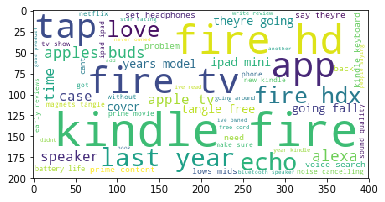

In [54]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',max_words=60).generate(text)
plt.imshow(wc)